# SeqRep Test

## Preprocessing

In [1]:
from SeqRep.dataset_builder import DatasetBuilder, SILVAHeaderParser
builder = DatasetBuilder(SILVAHeaderParser())
dataset = builder.from_fasta(['SILVA_138.1_SSURef_NR99_tax_silva.fasta'])
# dataset = builder.from_fasta(['small.fasta'])

In [2]:
dataset = dataset.drop_bad_headers()
len(dataset)

334360

In [12]:
kmer_counts = dataset.count_kmers(5, jobs=7, chunksize=100)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 334360/334360 [00:09<00:00, 34233.31it/s]


In [4]:
dataset.trim_seqs(1500)

## Simple Dense Network

In [28]:
from SeqRep.encoders import ModelBuilder
builder = ModelBuilder(1024)
builder.dense(512)
builder.dense(512)
builder.dense(512)
dense_model = builder.compile(output_dim=2)
dense_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_27 (Dense)            (None, 512)               524800    
                                                                 
 dense_28 (Dense)            (None, 512)               262656    
                                                                 
 dense_29 (Dense)            (None, 512)               262656    
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 1,051,138
Trainable params: 1,051,138
Non-tra

In [29]:
from SeqRep.comparative_encoder import ComparativeEncoder
from SeqRep.distance import Euclidean
dense_comp = ComparativeEncoder(dense_model, dist=Euclidean())

In [39]:
dense_comp.fit(kmer_counts, batch_size=100, epochs=7, jobs=7, chunksize=500)

Epoch 1:


100%|████████████████████| 334360/334360 [00:16<00:00, 20467.21it/s]


3344/3344 [==============================] - 41s 12ms/step - loss: 0.2073
Epoch time: 66.18736982345581
Epoch 2:


100%|████████████████████| 334360/334360 [00:15<00:00, 21931.15it/s]


3344/3344 [==============================] - 41s 12ms/step - loss: 0.2076
Epoch time: 65.42476606369019
Epoch 3:


100%|████████████████████| 334360/334360 [00:15<00:00, 20970.10it/s]


3344/3344 [==============================] - 41s 12ms/step - loss: 0.2072
Epoch time: 65.47609329223633
Epoch 4:


100%|████████████████████| 334360/334360 [00:15<00:00, 21226.45it/s]


3344/3344 [==============================] - 43s 13ms/step - loss: 0.2055
Epoch time: 68.72371792793274
Epoch 5:


100%|████████████████████| 334360/334360 [00:17<00:00, 19502.29it/s]


3344/3344 [==============================] - 46s 14ms/step - loss: 0.2045
Epoch time: 71.64712715148926
Epoch 6:


100%|████████████████████| 334360/334360 [00:17<00:00, 19264.74it/s]


3344/3344 [==============================] - 45s 13ms/step - loss: 0.2044
Epoch time: 70.66919183731079
Epoch 7:


100%|████████████████████| 334360/334360 [00:16<00:00, 19878.29it/s]


3344/3344 [==============================] - 44s 13ms/step - loss: 0.2037
Epoch time: 69.23326396942139


In [40]:
dense_comp.save('Models/densenet')

In [5]:
from SeqRep.comparative_encoder import ComparativeEncoder
dense_comp = ComparativeEncoder.load('Models/densenet')

Metal device set to: Apple M1 Pro


2023-01-04 19:17:45.556706: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-04 19:17:45.556839: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [41]:
dense_reprs = dense_comp.transform(kmer_counts, batch_size=100)

3344/3344 [==============================] - 7s 2ms/step


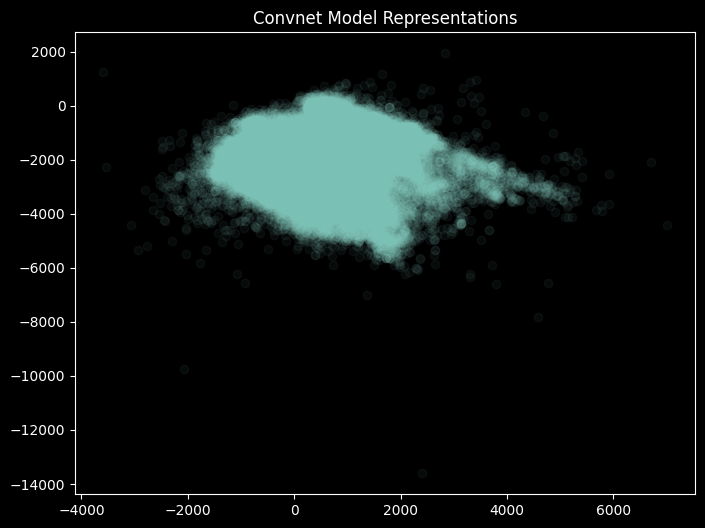

In [42]:
from SeqRep.visualize import repr_scatterplot
repr_scatterplot(dense_reprs, "Convnet Model Representations")

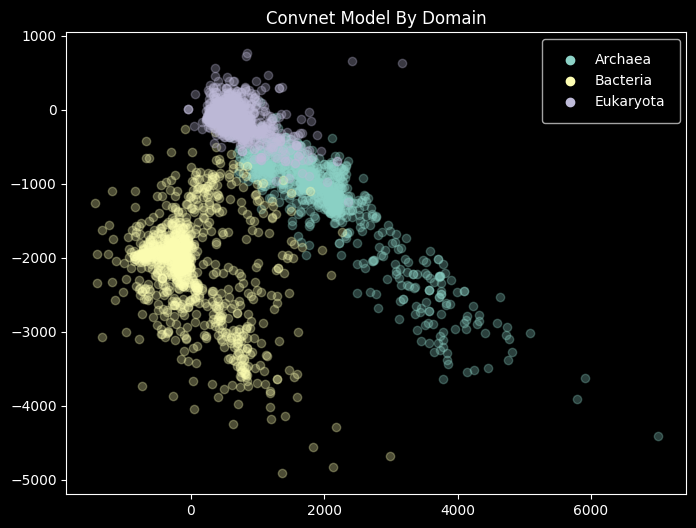

In [43]:
from SeqRep.visualize import reprs_by_taxa
reprs_by_taxa(dense_reprs, dataset, 'Domain', 'Convnet Model By Domain')

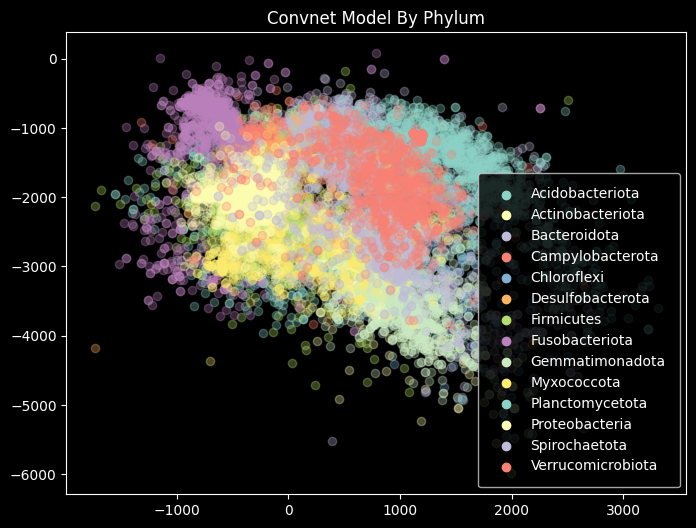

In [44]:
from SeqRep.visualize import reprs_by_taxa
mask = dataset['tax'].tax_mask('Domain', 'Bacteria')
reprs_by_taxa(dense_reprs, dataset, 'Phylum', 'Convnet Model By Phylum', filter=1000, mask=mask)

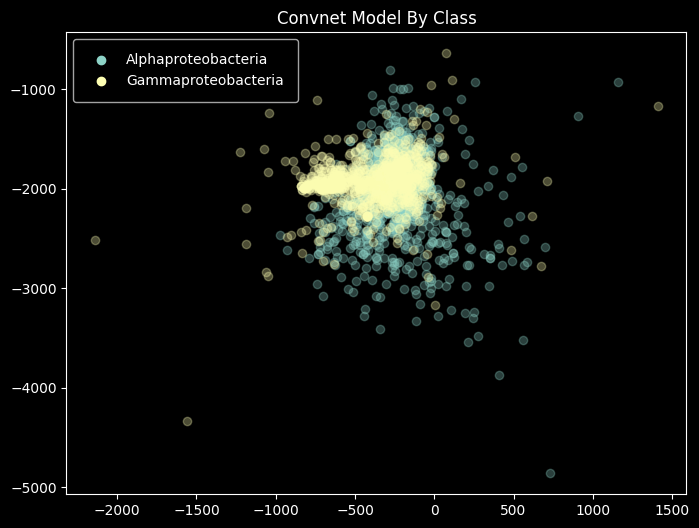

In [45]:
from SeqRep.visualize import reprs_by_taxa
mask = dataset['tax'].tax_mask('Phylum', 'Proteobacteria')
reprs_by_taxa(dense_reprs, dataset, 'Class', 'Convnet Model By Class', filter=1000, mask=mask)

## ConvNet

In [5]:
from SeqRep.encoders import ModelBuilder
builder = ModelBuilder(1024)
builder.dense(256)
builder.conv1D(64, 4)
conv_model = builder.compile(output_dim=2)
conv_model.summary()

Metal device set to: Apple M1 Pro
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 reshape (Reshape)           (None, 256, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 253, 64)           320       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 126, 64)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8064)              0         
                           

2023-01-04 21:03:26.233078: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-04 21:03:26.233218: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
from SeqRep.comparative_encoder import ComparativeEncoder
from SeqRep.distance import Euclidean
conv_comp = ComparativeEncoder(conv_model, dist=Euclidean())

In [7]:
conv_comp.fit(kmer_counts, batch_size=100, epochs=6, jobs=7, chunksize=500)

Epoch 1:


100%|████████████████████| 334360/334360 [00:13<00:00, 25085.21it/s]
2023-01-04 21:03:47.078324: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-04 21:03:47.078892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3344/3344 [==============================] - 58s 17ms/step - loss: 0.2314
Epoch time: 78.69913291931152
Epoch 2:


100%|████████████████████| 334360/334360 [00:12<00:00, 26183.80it/s]


3344/3344 [==============================] - 58s 17ms/step - loss: 0.2185
Epoch time: 78.2213728427887
Epoch 3:


100%|████████████████████| 334360/334360 [00:12<00:00, 26259.58it/s]


3344/3344 [==============================] - 58s 17ms/step - loss: 0.2136
Epoch time: 77.88945603370667
Epoch 4:


100%|████████████████████| 334360/334360 [00:13<00:00, 25530.49it/s]


3344/3344 [==============================] - 58s 17ms/step - loss: 0.2101
Epoch time: 78.13169622421265
Epoch 5:


100%|████████████████████| 334360/334360 [00:13<00:00, 24784.20it/s]


3344/3344 [==============================] - 58s 17ms/step - loss: 0.2096
Epoch time: 78.78330111503601
Epoch 6:


100%|████████████████████| 334360/334360 [00:13<00:00, 24312.21it/s]


3344/3344 [==============================] - 58s 17ms/step - loss: 0.2067
Epoch time: 78.83666610717773


In [15]:
conv_comp.save('Models/convnet')

In [5]:
from SeqRep.comparative_encoder import ComparativeEncoder
conv_comp = ComparativeEncoder.load('Models/convnet')

Metal device set to: Apple M1 Pro


2023-01-04 19:17:45.556706: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-04 19:17:45.556839: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
conv_reprs = conv_comp.transform(kmer_counts, batch_size=100)

  44/3344 [..............................] - ETA: 7s

2023-01-04 21:17:12.712391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3344/3344 [==============================] - 9s 3ms/step


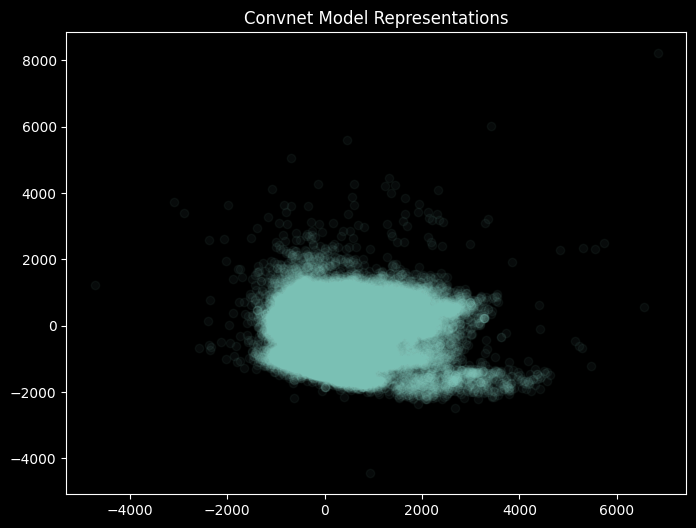

In [9]:
from SeqRep.visualize import repr_scatterplot
repr_scatterplot(conv_reprs, "Convnet Model Representations")

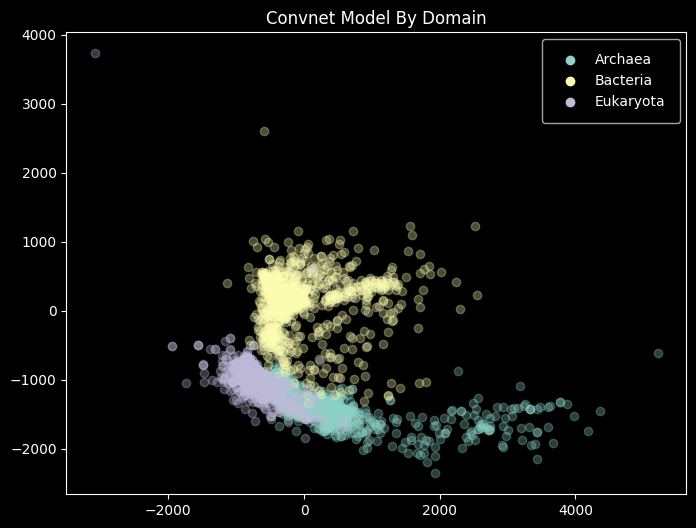

In [10]:
from SeqRep.visualize import reprs_by_taxa
reprs_by_taxa(conv_reprs, dataset, 'Domain', 'Convnet Model By Domain')

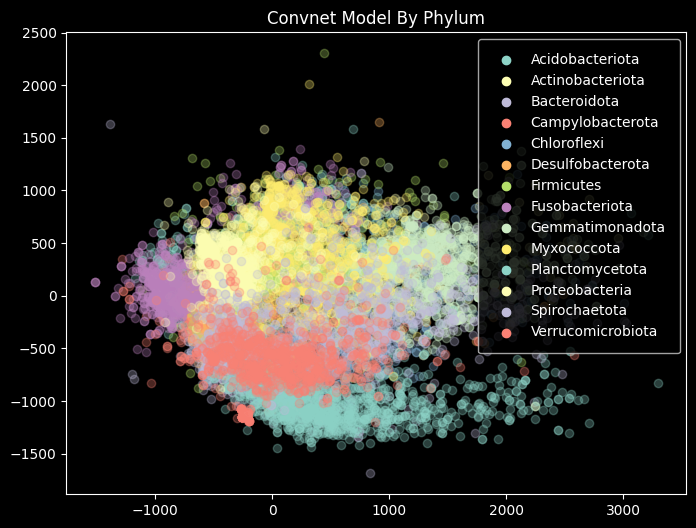

In [11]:
from SeqRep.visualize import reprs_by_taxa
mask = dataset['tax'].tax_mask('Domain', 'Bacteria')
reprs_by_taxa(conv_reprs, dataset, 'Phylum', 'Convnet Model By Phylum', filter=1000, mask=mask)

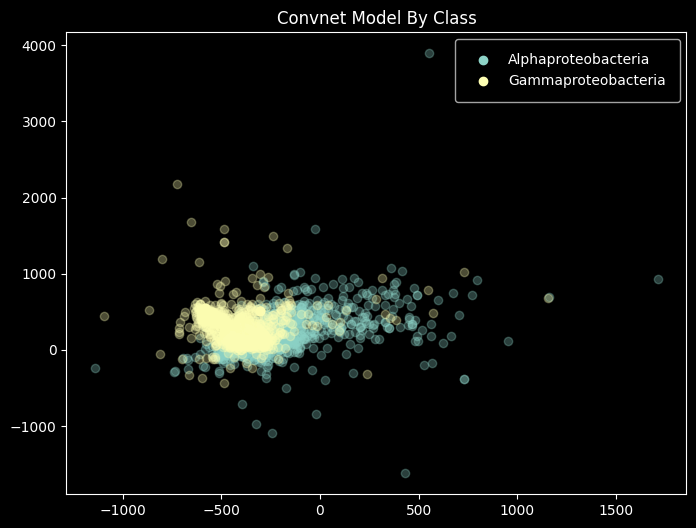

In [12]:
from SeqRep.visualize import reprs_by_taxa
mask = dataset['tax'].tax_mask('Phylum', 'Proteobacteria')
reprs_by_taxa(conv_reprs, dataset, 'Class', 'Convnet Model By Class', filter=1000, mask=mask)

## Attention Network

In [15]:
from SeqRep.encoders import ModelBuilder
builder = ModelBuilder(1024)
builder.dense(256)
builder.attention(4, 2, 128, divide=True)
attn_model = builder.compile(output_dim=2)
attn_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_9 (Dense)             (None, 256)               262400    
                                                                 
 reshape_3 (Reshape)         (None, 64, 4)             0         
                                                                 
 attention_block_2 (Attentio  (None, 64, 4)            1328      
 nBlock)                                                         
                                                                 
 batch_normalization_3 (Batc  (None, 64, 4)            16        
 hNormalization)                                                 
                                                                 
 flatten_3 (Flatten)         (None, 256)               0   

In [16]:
from SeqRep.comparative_encoder import ComparativeEncoder
from SeqRep.distance import Euclidean
attn_comp = ComparativeEncoder(attn_model, dist=Euclidean())

In [17]:
attn_comp.fit(kmer_counts, batch_size=100, epochs=6, jobs=7, chunksize=1000)

Epoch 1:


100%|████████████████████| 334360/334360 [00:15<00:00, 22110.53it/s]
2023-01-04 23:38:23.417353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3344/3344 [==============================] - 170s 50ms/step - loss: 0.2352
Epoch time: 197.25054597854614
Epoch 2:


100%|████████████████████| 334360/334360 [00:14<00:00, 22834.41it/s]


3344/3344 [==============================] - 166s 49ms/step - loss: 0.2209
Epoch time: 192.10749006271362
Epoch 3:


100%|████████████████████| 334360/334360 [00:14<00:00, 23314.79it/s]


3344/3344 [==============================] - 159s 47ms/step - loss: 0.2178
Epoch time: 185.16431879997253
Epoch 4:


100%|████████████████████| 334360/334360 [00:14<00:00, 23115.08it/s]


3344/3344 [==============================] - 156s 47ms/step - loss: 0.2157
Epoch time: 181.48078107833862
Epoch 5:


100%|████████████████████| 334360/334360 [00:14<00:00, 23370.29it/s]


3344/3344 [==============================] - 156s 47ms/step - loss: 0.2143
Epoch time: 182.39366722106934
Epoch 6:


100%|████████████████████| 334360/334360 [00:14<00:00, 23190.49it/s]


3344/3344 [==============================] - 157s 47ms/step - loss: 0.2128
Epoch time: 182.93653512001038


In [18]:
attn_comp.save('Models/attn')

In [11]:
from SeqRep.comparative_encoder import ComparativeEncoder
attn_comp = ComparativeEncoder.load('Models/attn')

In [19]:
attn_reprs = attn_comp.transform(kmer_counts, batch_size=100)

2023-01-04 23:57:41.006692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3344/3344 [==============================] - 40s 12ms/step


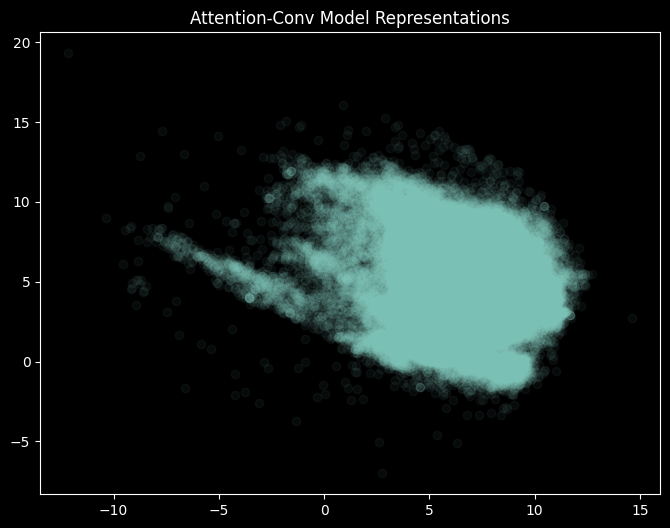

In [20]:
from SeqRep.visualize import repr_scatterplot
repr_scatterplot(attn_reprs, "Attention-Conv Model Representations")

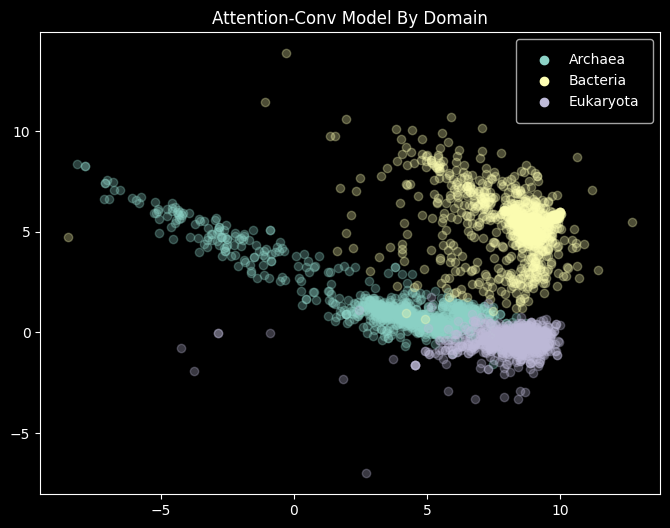

In [21]:
from SeqRep.visualize import reprs_by_taxa
reprs_by_taxa(attn_reprs, dataset, 'Domain', 'Attention-Conv Model By Domain')

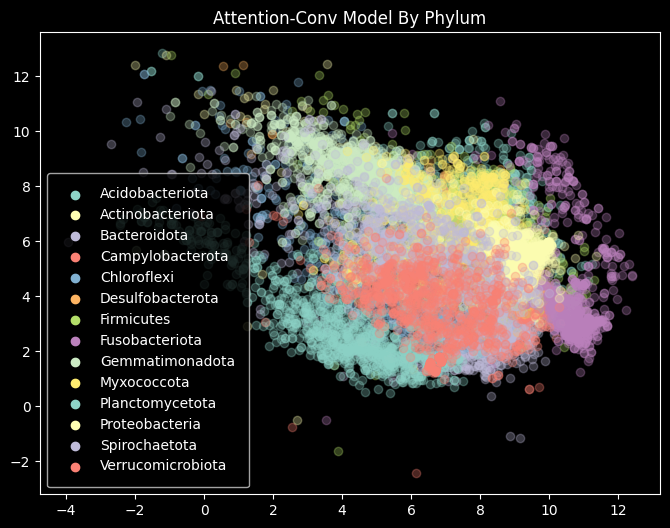

In [22]:
from SeqRep.visualize import reprs_by_taxa
mask = dataset['tax'].tax_mask('Domain', 'Bacteria')
reprs_by_taxa(attn_reprs, dataset, 'Phylum', 'Attention-Conv Model By Phylum', filter=1000, mask=mask)

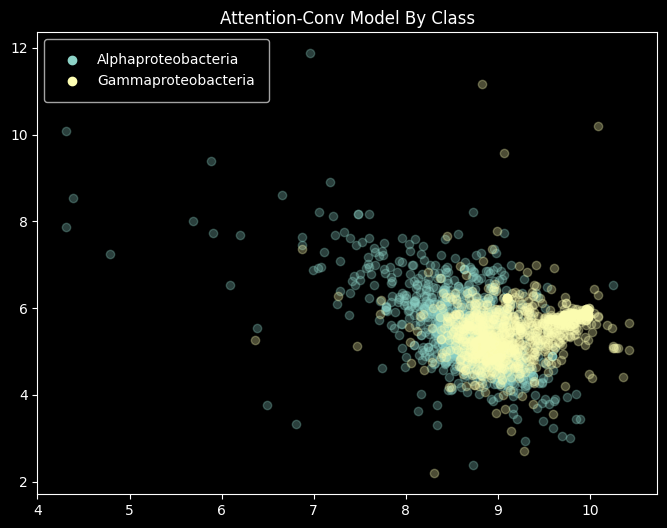

In [23]:
from SeqRep.visualize import reprs_by_taxa
mask = dataset['tax'].tax_mask('Phylum', 'Proteobacteria')
reprs_by_taxa(attn_reprs, dataset, 'Class', 'Attention-Conv Model By Class', filter=1000, mask=mask)

## Attention-Conv Network

In [5]:
from SeqRep.encoders import ModelBuilder
builder = ModelBuilder(1024)
builder.dense(256)
builder.conv1D(64, 4)
builder.attention(4, 2, 128, divide=True)
attn_model = builder.compile(output_dim=2)
attn_model.summary()

Metal device set to: Apple M1 Pro


2023-01-04 23:22:15.211064: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-04 23:22:15.211372: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 reshape (Reshape)           (None, 256, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 253, 64)           320       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 126, 64)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8064)              0         
                                                             

In [6]:
from SeqRep.comparative_encoder import ComparativeEncoder
from SeqRep.distance import Euclidean
attn_comp = ComparativeEncoder(attn_model, dist=Euclidean())

In [7]:
attn_comp.fit(kmer_counts, batch_size=100, epochs=4, jobs=7, chunksize=1000)

Epoch 1:


100%|████████████████████| 334360/334360 [00:11<00:00, 27871.05it/s]
2023-01-04 23:22:36.439302: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-04 23:22:36.442305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3344/3344 [==============================] - 158s 47ms/step - loss: 0.2477
Epoch time: 178.37399101257324
Epoch 2:


100%|████████████████████| 334360/334360 [00:12<00:00, 26805.14it/s]


3344/3344 [==============================] - 156s 47ms/step - loss: 0.2238
Epoch time: 176.04116916656494
Epoch 3:


100%|████████████████████| 334360/334360 [00:12<00:00, 26189.10it/s]


3344/3344 [==============================] - 157s 47ms/step - loss: 0.2218
Epoch time: 177.37169289588928
Epoch 4:


100%|████████████████████| 334360/334360 [00:12<00:00, 26902.34it/s]


3344/3344 [==============================] - 156s 47ms/step - loss: 0.2154
Epoch time: 176.05519199371338


In [8]:
attn_comp.save('Models/attn-conv')

In [11]:
from SeqRep.comparative_encoder import ComparativeEncoder
attn_comp = ComparativeEncoder.load('Models/attn')

In [9]:
attn_reprs = attn_comp.transform(kmer_counts, batch_size=100)

2023-01-04 23:35:14.519788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3344/3344 [==============================] - 34s 10ms/step


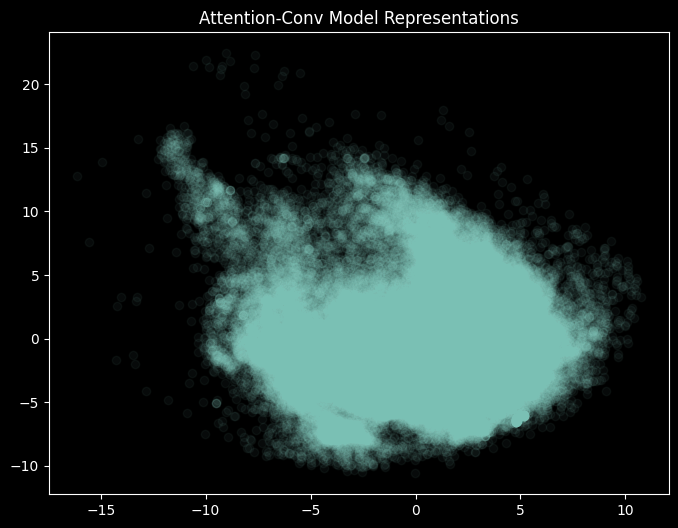

In [10]:
from SeqRep.visualize import repr_scatterplot
repr_scatterplot(attn_reprs, "Attention-Conv Model Representations")

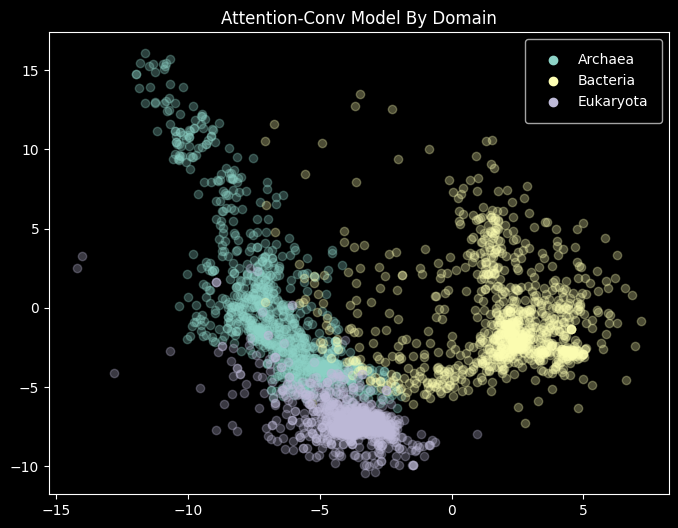

In [11]:
from SeqRep.visualize import reprs_by_taxa
reprs_by_taxa(attn_reprs, dataset, 'Domain', 'Attention-Conv Model By Domain')

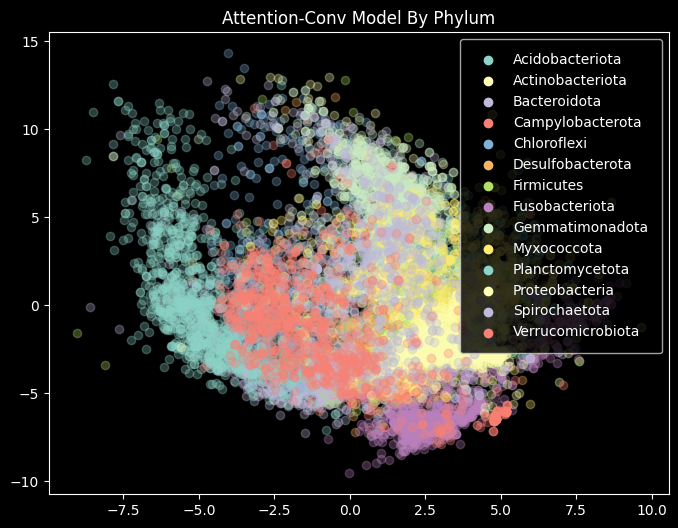

In [12]:
from SeqRep.visualize import reprs_by_taxa
mask = dataset['tax'].tax_mask('Domain', 'Bacteria')
reprs_by_taxa(attn_reprs, dataset, 'Phylum', 'Attention-Conv Model By Phylum', filter=1000, mask=mask)

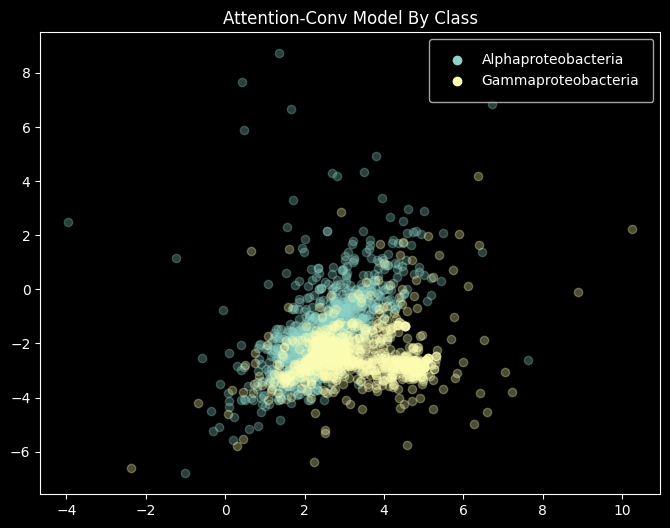

In [13]:
from SeqRep.visualize import reprs_by_taxa
mask = dataset['tax'].tax_mask('Phylum', 'Proteobacteria')
reprs_by_taxa(attn_reprs, dataset, 'Class', 'Attention-Conv Model By Class', filter=1000, mask=mask)

## Sequential Model

In [4]:
dataset.trim_seqs(300)

In [5]:
encoded = dataset.one_hot_encode(jobs=7, chunksize=50)

100%|████████████████████| 334360/334360 [00:15<00:00, 21105.78it/s]


In [9]:
from SeqRep.encoders import ModelBuilder
builder = ModelBuilder(encoded.shape[1:])
builder.flatten()
builder.dense(300)
builder.conv1D(128, 4, 128, divide=4)
builder.attention(4, 2, 250, divide=False)
seq_model = builder.compile(output_dim=2)
seq_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300, 5)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 1500)              0         
                                                                 
 dense_9 (Dense)             (None, 300)               450300    
                                                                 
 reshape_2 (Reshape)         (None, 75, 4)             0         
                                                                 
 conv1d_2 (Conv1D)           (None, 72, 128)           2176      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 36, 128)          0         
 1D)                                                             
                                                           

In [10]:
from SeqRep.comparative_encoder import ComparativeEncoder
from SeqRep.distance import Euclidean
seq_comp = ComparativeEncoder(seq_model, dist=Euclidean())

In [13]:
seq_comp.fit(encoded, batch_size=100, epochs=1, jobs=7, chunksize=500, distance_on=kmer_counts)

Epoch 1:


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 334360/334360 [01:15<00:00, 4409.44it/s]


0.2773063506336025


2023-02-08 16:55:13.992670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 308/3344 [=>............................] - ETA: 4:30 - loss: 0.3905

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x1799e3e20>
Traceback (most recent call last):
  File "/Users/NikhilKalidasu/miniforge3/envs/tensorflow/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 
Exception ignored in: <function _EagerDefinedFunctionDeleter.__del__ at 0x159026950>
Traceback (most recent call last):
  File "/Users/NikhilKalidasu/miniforge3/envs/tensorflow/lib/python3.10/site-packages/tensorflow/python/eager/function.py", line 305, in __del__
    context.remove_function(self.name)
  File "/Users/NikhilKalidasu/miniforge3/envs/tensorflow/lib/python3.10/site-packages/tensorflow/python/eager/context.py", line 2740, in remove_function
    context().remove_function(name)
  File "/Users/NikhilKalidasu/miniforge3/envs/tensorflow/lib/python3.10/site-packages/tensorflow/python/eager/context.py", line 1384, in remove_function
    pywrap_tfe.TFE_ContextRemoveFunction(self._handle, name)
Keyb

In [ ]:
seq_comp.save('Models/seq_attn')

In [6]:
from SeqRep.comparative_encoder import ComparativeEncoder
seq_comp = ComparativeEncoder.load('Models/seq_attn')

Metal device set to: Apple M1 Pro


2023-01-04 23:01:50.008607: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-04 23:01:50.008733: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
seq_reprs = seq_comp.transform(encoded, batch_size=100)

2023-01-04 23:02:08.810291: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-04 23:02:08.876768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3344/3344 [==============================] - 62s 19ms/step


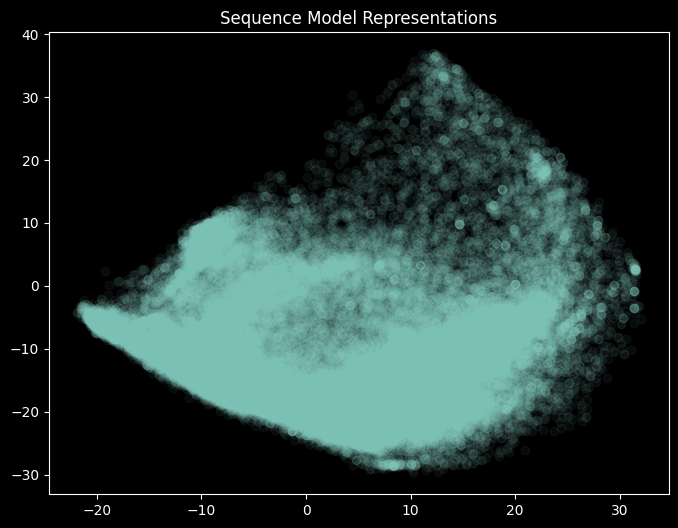

In [9]:
from SeqRep.visualize import repr_scatterplot
repr_scatterplot(seq_reprs, "Sequence Model Representations")

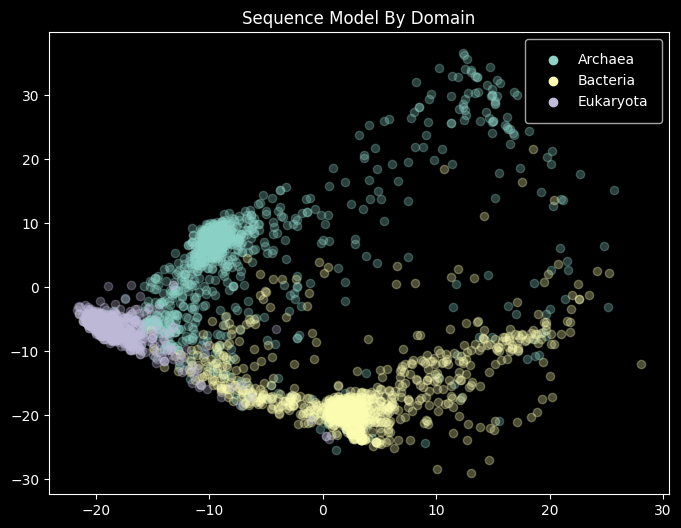

In [10]:
from SeqRep.visualize import reprs_by_taxa
reprs_by_taxa(seq_reprs, dataset, 'Domain', 'Sequence Model By Domain')

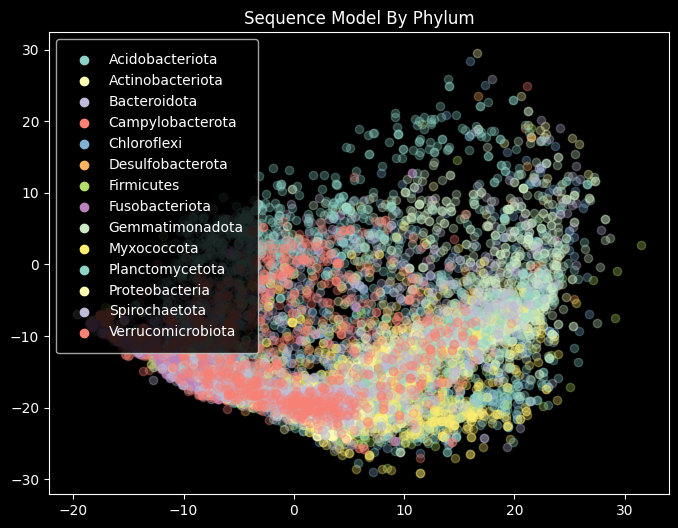

In [11]:
from SeqRep.visualize import reprs_by_taxa
mask = dataset['tax'].tax_mask('Domain', 'Bacteria')
reprs_by_taxa(seq_reprs, dataset, 'Phylum', 'Sequence Model By Phylum', filter=1000, mask=mask)

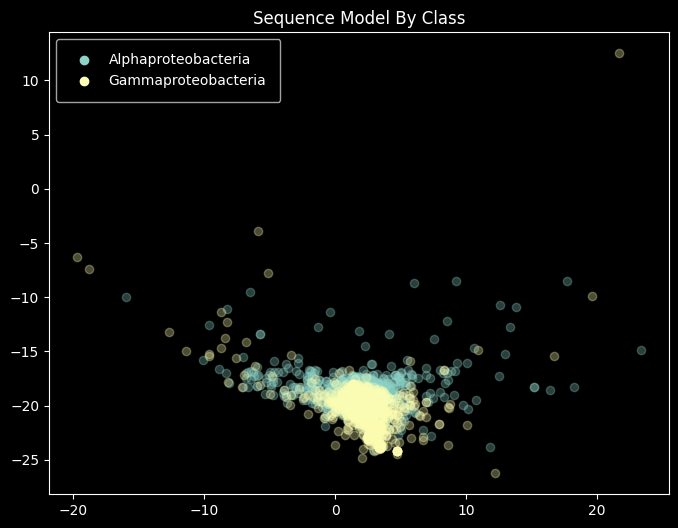

In [12]:
from SeqRep.visualize import reprs_by_taxa
mask = dataset['tax'].tax_mask('Phylum', 'Proteobacteria')
reprs_by_taxa(seq_reprs, dataset, 'Class', 'Sequence Model By Class', filter=1000, mask=mask)

## Alignment Distance

In [3]:
dataset.trim_seqs(300)

In [4]:
encoded = dataset.one_hot_encode(jobs=7, chunksize=50)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 334360/334360 [00:16<00:00, 20683.27it/s]


In [5]:
from SeqRep.encoders import ModelBuilder
builder = ModelBuilder(encoded.shape[1:])
builder.dense(50)
builder.reshape((100, 50 * 3))
builder.conv1D(20, 3, 100 * 50 * 3, expand=False)
builder.reshape((100, 50 * 3))
builder.attention(50 * 3, 4, 100, expand=False)
builder.attention(50 * 3, 4, 100, expand=False)
builder.conv1D(20, 3, 980, expand=False)
aln_model = builder.compile(output_dim=2)
aln_model.summary()

Metal device set to: Apple M1 Pro


2023-02-08 20:37:52.401337: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-08 20:37:52.401740: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 5)]          0         
                                                                 
 dense (Dense)               (None, 300, 50)           300       
                                                                 
 reshape (Reshape)           (None, 100, 150)          0         
                                                                 
 conv1d (Conv1D)             (None, 98, 20)            9020      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 20)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 980)               0         
                                                             

In [6]:
from SeqRep.comparative_encoder import ComparativeEncoder
from SeqRep.distance import Alignment
aln_comp = ComparativeEncoder(aln_model, dist=Alignment())

In [7]:
import numpy as np
trimmed_seqs = np.vectorize(lambda i: i[:300])(dataset['seqs'].to_numpy())

In [ ]:
for i in range(5):
    aln_comp.fit(encoded, batch_size=10, epochs=1, jobs=7, chunksize=50, distance_on=trimmed_seqs)
    aln_comp.save('Models/aln_attn')

Epoch 1:


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 334360/334360 [01:03<00:00, 5255.56it/s]
2023-02-08 20:39:10.581301: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-08 20:39:10.586378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 6276/33436 [====>.........................] - ETA: 6:21:56 - loss: 0.6482

In [ ]:
aln_comp.save('Models/aln_attn')

In [6]:
from SeqRep.comparative_encoder import ComparativeEncoder
aln_comp = ComparativeEncoder.load('Models/aln_attn')

Metal device set to: Apple M1 Pro


2023-01-04 23:01:50.008607: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-04 23:01:50.008733: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
aln_reprs = aln_comp.transform(encoded, batch_size=100)

   1/3344 [..............................] - ETA: 21:54

2023-02-08 17:34:22.298648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3344/3344 [==============================] - 81s 24ms/step


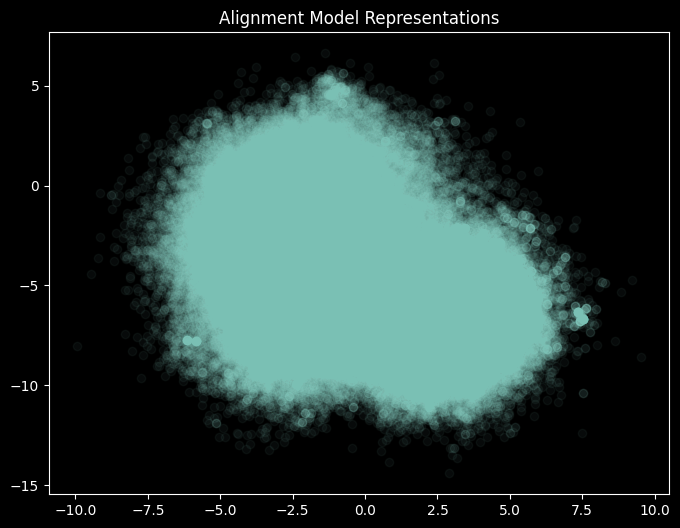

In [12]:
from SeqRep.visualize import repr_scatterplot
repr_scatterplot(aln_reprs, "Alignment Model Representations")

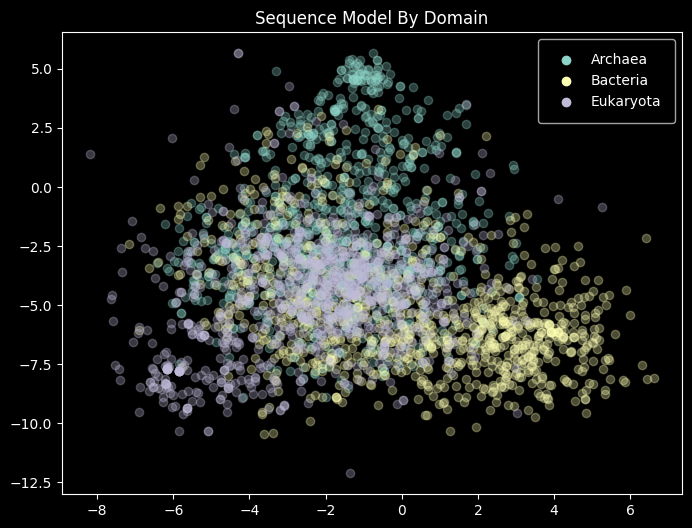

In [14]:
from SeqRep.visualize import reprs_by_taxa
reprs_by_taxa(aln_reprs, dataset, 'Domain', 'Sequence Model By Domain')

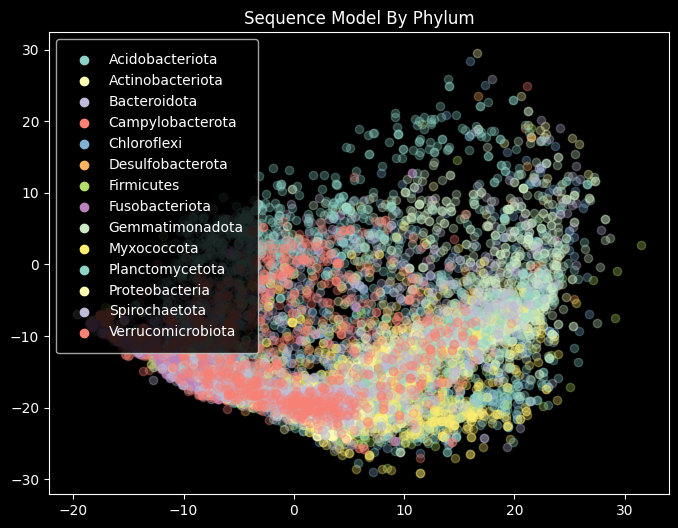

In [11]:
from SeqRep.visualize import reprs_by_taxa
mask = dataset['tax'].tax_mask('Domain', 'Bacteria')
reprs_by_taxa(seq_reprs, dataset, 'Phylum', 'Sequence Model By Phylum', filter=1000, mask=mask)

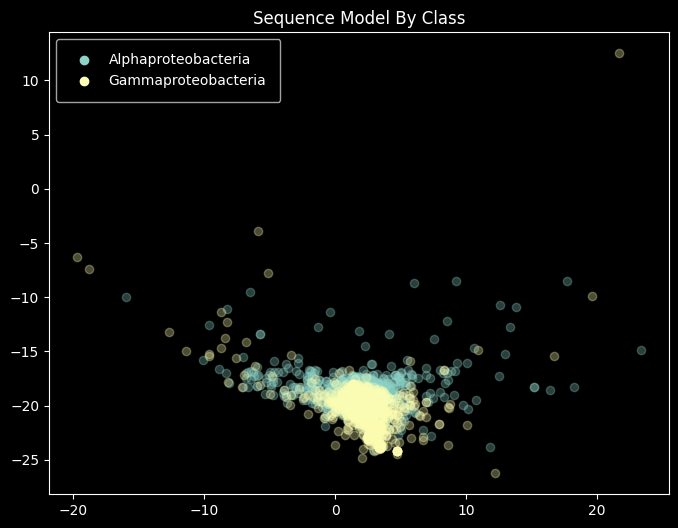

In [12]:
from SeqRep.visualize import reprs_by_taxa
mask = dataset['tax'].tax_mask('Phylum', 'Proteobacteria')
reprs_by_taxa(seq_reprs, dataset, 'Class', 'Sequence Model By Class', filter=1000, mask=mask)